# Initial Read

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns
sns.set()  #  Will import Seaborn functionalities

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [2]:
Box_office = pd.read_csv('box_office_predictions.csv') 
Box_office.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853


In [3]:
print("Old Column Names:\n", Box_office.columns) 

Old Column Names:
 Index(['budget', 'country', 'director', 'genre', 'gross', 'name', 'rating',
       'runtime', 'score', 'star', 'studio', 'votes'],
      dtype='object')


In [4]:
Box_office.shape

(6000, 12)

In [5]:
Box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6000 non-null   float64
 1   country   6000 non-null   object 
 2   director  6000 non-null   object 
 3   genre     6000 non-null   object 
 4   gross     6000 non-null   float64
 5   name      6000 non-null   object 
 6   rating    6000 non-null   object 
 7   runtime   6000 non-null   int64  
 8   score     6000 non-null   float64
 9   star      6000 non-null   object 
 10  studio    6000 non-null   object 
 11  votes     6000 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 562.6+ KB


# Categorical Data

In [6]:
Box_office.describe(include=['object', 'bool', 'category'])

,country,director,genre,name,rating,star,studio
count,6000,6000,6000,6000,6000,6000,6000
unique,52,2549,17,6000,13,2317,1996
top,USA,Woody Allen,Comedy,Avatar (2009),R,Nicolas Cage,Universal Pictures
freq,4281,29,1818,1,3009,38,269


In [7]:
print(Box_office['rating'].unique())

['PG-13' 'PG' 'G' 'R' 'Not specified' 'NC-17' 'UNRATED' 'NOT RATED'
 'TV-PG' 'B' 'TV-14' 'TV-MA' 'B15']


In [8]:
Box_office['rating'].value_counts()

R                3009
PG-13            1753
PG                815
NOT RATED         151
G                 133
UNRATED            58
Not specified      56
NC-17              20
TV-PG               1
B                   1
TV-14               1
TV-MA               1
B15                 1
Name: rating, dtype: int64

In [11]:
print(Box_office['star'].unique())

['Sam Worthington' 'Leonardo DiCaprio' 'Chris Pratt' ... 'Sadie Frost'
 'Florian Lukas' 'Jemma Dallender']


In [12]:
Box_office['star'].value_counts()

Nicolas Cage              38
Robert De Niro            35
Tom Hanks                 29
Denzel Washington         29
Bruce Willis              28
                          ..
Sonny Bono                 1
Prabhas                    1
Jean-Louis Trintignant     1
Joseph Cross               1
Jemma Dallender            1
Name: star, Length: 2317, dtype: int64

In [13]:
print(Box_office['genre'].unique())

['Action' 'Drama' 'Animation' 'Adventure' 'Comedy' 'Biography' 'Mystery'
 'Crime' 'Horror' 'Sci-Fi' 'Fantasy' 'Romance' 'Thriller' 'Family'
 'Western' 'Musical' 'War']


In [14]:
Box_office['genre'].value_counts()

Comedy       1818
Drama        1280
Action       1175
Crime         463
Adventure     340
Biography     309
Animation     246
Horror        243
Mystery        34
Fantasy        28
Thriller       17
Romance        14
Sci-Fi         13
Family         12
Musical         4
Western         2
War             2
Name: genre, dtype: int64

# Fixing budget 0 values

In [15]:
Box_office['budget'].value_counts()

0.0           1911
20000000.0     166
30000000.0     164
25000000.0     160
15000000.0     152
              ... 
16200000.0       1
17700000.0       1
21150000.0       1
25100000.0       1
20000.0          1
Name: budget, Length: 338, dtype: int64

In [16]:
Box_office_v2 = Box_office.copy()
Box_office_v2.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853


In [17]:
median_budget = Box_office_v2.budget.median()
median_budget

11000000.0

In [18]:
Box_office_v2['budget'] = Box_office_v2['budget'].replace({0: 11000000})

In [19]:
Box_office_v2['budget'].value_counts()

11000000.0    1966
20000000.0     166
30000000.0     164
25000000.0     160
15000000.0     152
              ... 
16200000.0       1
17700000.0       1
21150000.0       1
25100000.0       1
20000.0          1
Name: budget, Length: 337, dtype: int64

# Creating Target Variable as a computed value

In [79]:
Profit = Box_office_v2["gross"] - Box_office_v2['budget']
Profit

0       523507625.0
1       458672302.0
2       502270625.0
3       403357910.0
4       349858444.0
           ...     
5995    -10998857.0
5996    -10999172.0
5997    -10999453.0
5998    -10999458.0
5999    -10999559.0
Length: 6000, dtype: float64

In [80]:
ROI = (Box_office_v2['gross'] - Box_office_v2['budget'])/Box_office_v2['budget']*100
ROI

0       220.889293
1       229.336151
2       334.847083
3       183.344505
4       189.112672
           ...    
5995    -99.989609
5996    -99.992473
5997    -99.995027
5998    -99.995073
5999    -99.995991
Length: 6000, dtype: float64

In [81]:
Box_office_v2['Profit'] = Profit
Box_office_v2['ROI'] = ROI

In [82]:
Box_office_v2.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes,Profit,ROI
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,523507625.0,220.889293
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,458672302.0,229.336151
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625,502270625.0,334.847083
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292,403357910.0,183.344505
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853,349858444.0,189.112672


In [83]:
Box_office_v2['ROI'] = np.where(Box_office_v2['ROI'] > 0.95, 1, 0)

In [84]:
Box_office_v2

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes,Profit,ROI
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,523507625.0,1
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,458672302.0,1
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625,502270625.0,1
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292,403357910.0,1
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853,349858444.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,11000000.0,UK,Dominic Anciano,Comedy,1143.0,"Love, Honor and Obey (2000)",R,103,6.5,Sadie Frost,British Broadcasting Corporation (BBC),4557,-10998857.0,0
5996,11000000.0,Ireland,Ian Fitzgibbon,Action,828.0,Perrier's Bounty (2009),R,88,6.4,Gabriel Byrne,Parallel Film Productions,5540,-10999172.0,0
5997,11000000.0,Norway,Petter Næss,Action,547.0,Into the White (2012),R,104,7.2,Florian Lukas,Zentropa International Norway,16674,-10999453.0,0
5998,11000000.0,UK,Sheree Folkson,Comedy,542.0,The Decoy Bride (2011),PG,89,6.2,Kelly Macdonald,Isle of Man Film,9055,-10999458.0,0


In [85]:
Box_office_v2['ROI'].value_counts()

0    3628
1    2372
Name: ROI, dtype: int64

In [86]:
Box_office_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6000 non-null   float64
 1   country   6000 non-null   object 
 2   director  6000 non-null   object 
 3   genre     6000 non-null   object 
 4   gross     6000 non-null   float64
 5   name      6000 non-null   object 
 6   rating    6000 non-null   object 
 7   runtime   6000 non-null   int64  
 8   score     6000 non-null   float64
 9   star      6000 non-null   object 
 10  studio    6000 non-null   object 
 11  votes     6000 non-null   int64  
 12  Profit    6000 non-null   float64
 13  ROI       6000 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 656.4+ KB


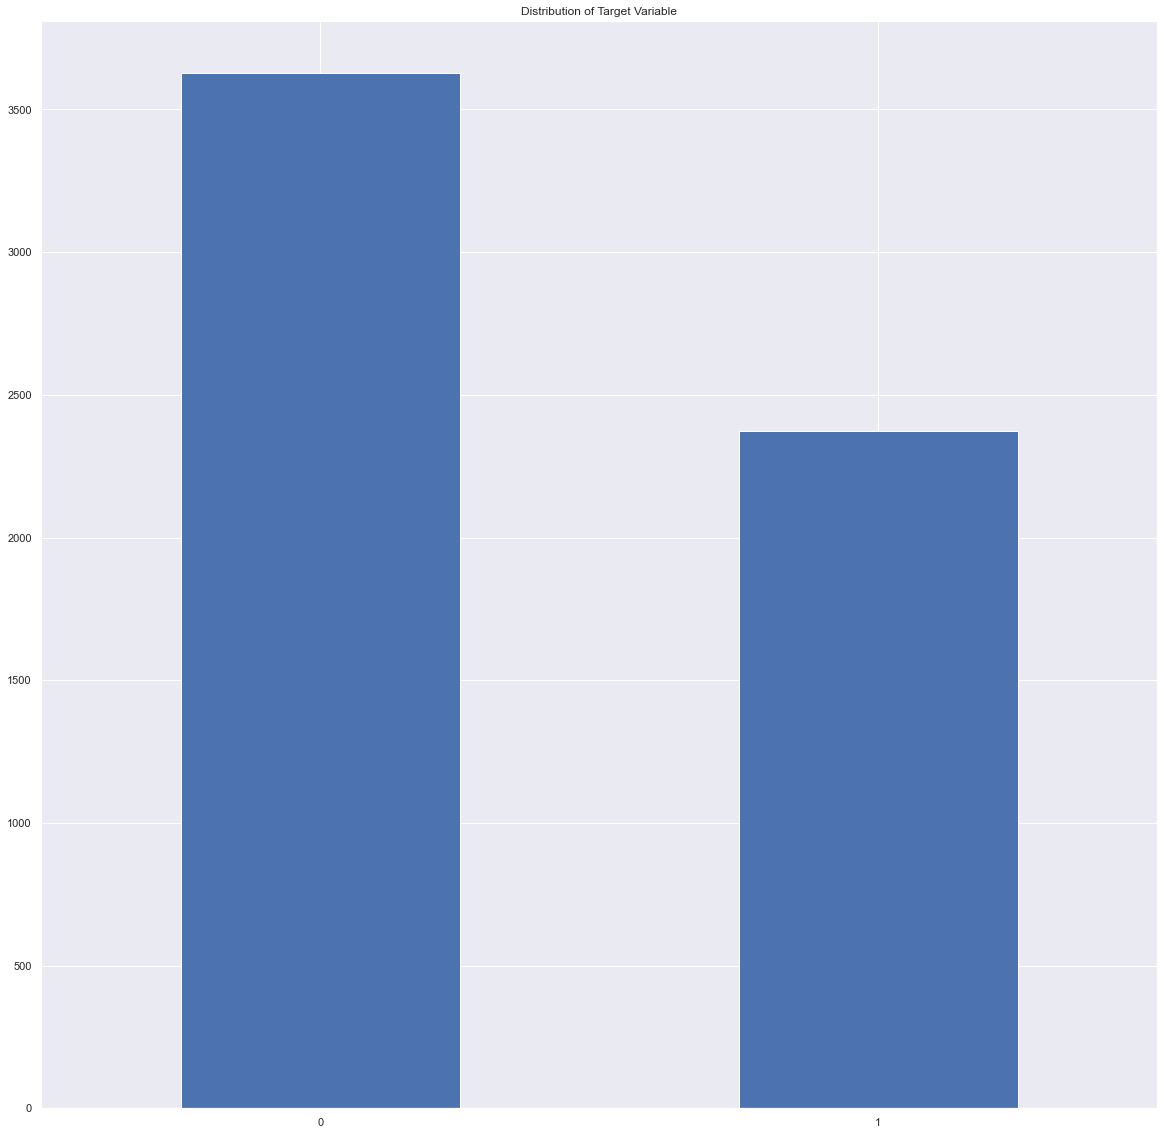

In [87]:
(Box_office_v2['ROI'].value_counts().plot(kind='bar',title='Distribution of Target Variable', x= 'budget',
                                             y= 'TV_ROI', rot=0)
                                            );
#plt.show()

In [28]:
Box_office_v2['ROI'].value_counts(normalize=True)

0    0.604667
1    0.395333
Name: ROI, dtype: float64

# Checking for skewness

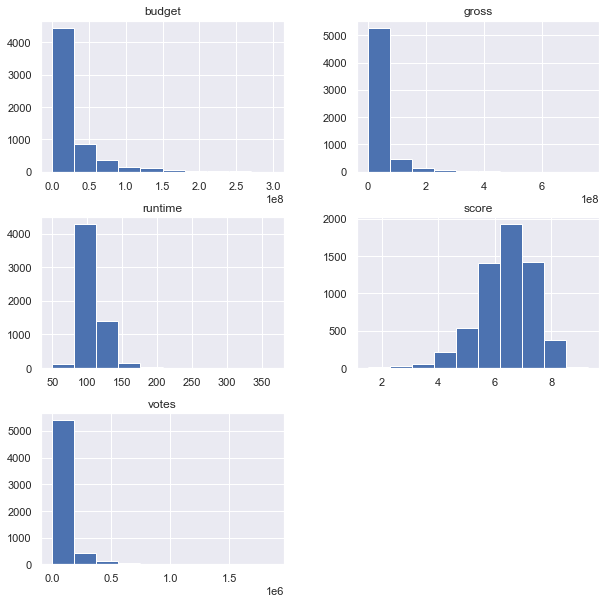

In [29]:
sns.set()
features = ['budget', 'country', 'director', 'genre', 'gross', 'name', 'rating',
            'runtime', 'score', 'star', 'studio', 'votes']

Box_office_v2[features].hist(figsize=(10,10));

# Coorrelation

In [30]:
corr_matrix = Box_office_v2.corr()  
corr_matrix

,budget,gross,runtime,score,votes,Profit,ROI
budget,1.000000,0.712052,0.267344,0.044869,0.494107,0.138909,0.088688
gross,0.712052,1.000000,0.224996,0.161371,0.664010,0.794230,0.466347
runtime,0.267344,0.224996,1.000000,0.393470,0.308524,0.085985,0.010697
score,0.044869,0.161371,0.393470,1.000000,0.393703,0.188774,0.106497
votes,0.494107,0.664010,0.308524,0.393703,1.000000,0.508946,0.323512
Profit,0.138909,0.794230,0.085985,0.188774,0.508946,1.000000,0.581003
ROI,0.088688,0.466347,0.010697,0.106497,0.323512,0.581003,1.000000


In [31]:
Box_office_v2.corr()

,budget,gross,runtime,score,votes,Profit,ROI
budget,1.000000,0.712052,0.267344,0.044869,0.494107,0.138909,0.088688
gross,0.712052,1.000000,0.224996,0.161371,0.664010,0.794230,0.466347
runtime,0.267344,0.224996,1.000000,0.393470,0.308524,0.085985,0.010697
score,0.044869,0.161371,0.393470,1.000000,0.393703,0.188774,0.106497
votes,0.494107,0.664010,0.308524,0.393703,1.000000,0.508946,0.323512
Profit,0.138909,0.794230,0.085985,0.188774,0.508946,1.000000,0.581003
ROI,0.088688,0.466347,0.010697,0.106497,0.323512,0.581003,1.000000


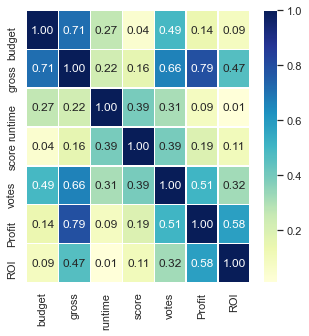

In [33]:
corr_matrix = Box_office_v2.corr()
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

# Outliers

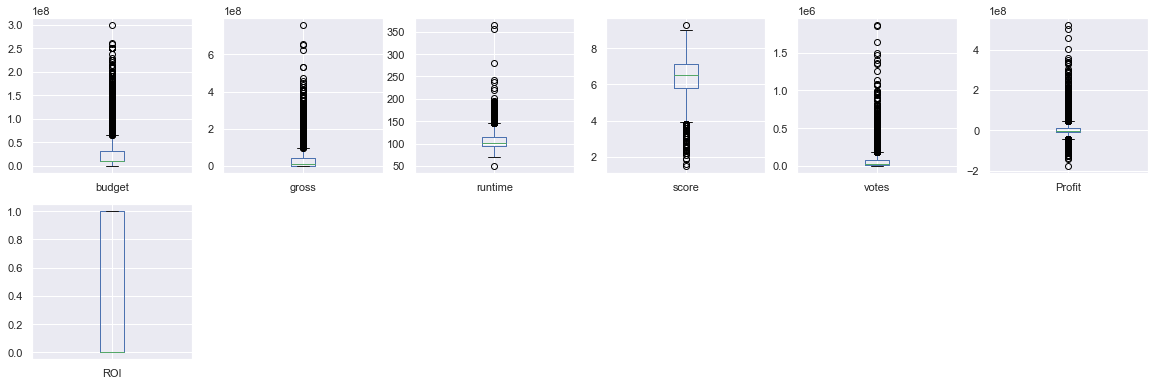

In [34]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20,20  # control plot size
Box_office_v2.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
plt.show()

# Dealing with Cardinality

# Level down Country

In [88]:
Box_office_v2.loc[Box_office_v2['country'] != 'USA', ['country']] = 'non-USA'

Box_office_v2['country'].unique()
Box_office_v2['country'].value_counts()

USA        4281
non-USA    1719
Name: country, dtype: int64

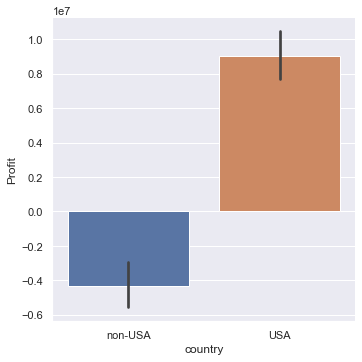

In [89]:
sns.factorplot(x ='country', y = 'Profit',  kind = 'bar', data = Box_office_v2, size=5, aspect=1);

# Level down Rating

In [90]:
Box_office_v2 = Box_office_v2.replace(to_replace =["PG-13","PG","G","TV-PG","TV-14","B15"] ,  value ="PG")
#Box_office_v2 = Box_office_v2.replace(to_replace =[] ,  value ="Youth")
Box_office_v2 = Box_office_v2.replace(to_replace =["Not specified","UNRATED","NOT RATED","B"] ,  value ="NR")
Box_office_v2 = Box_office_v2.replace(to_replace =["R","TV-MA","NC-17"] ,  value ="R")

In [91]:
Box_office_v2['rating'].value_counts()

R     3030
PG    2704
NR     266
Name: rating, dtype: int64

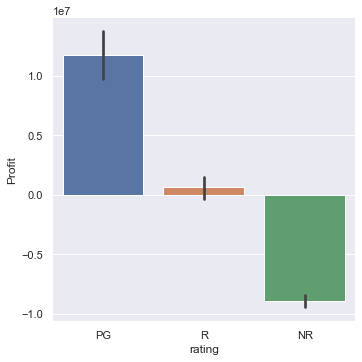

In [92]:
sns.factorplot(x ='rating', y = 'Profit',  kind = 'bar', data = Box_office_v2, size=5, aspect=1);

# Level down Genre

In [93]:
Box_office_v2 = Box_office_v2.replace(to_replace =["Crime","Adventure","Biography","Animation","Horror","Mystery",
                                                   "Fantasy","Thriller","Romance","Sci-Fi","Family","Musical",
                                                   "War","Western"], value ="Others")


In [94]:
Box_office_v2['genre'].value_counts()

Comedy    1818
Others    1727
Drama     1280
Action    1175
Name: genre, dtype: int64

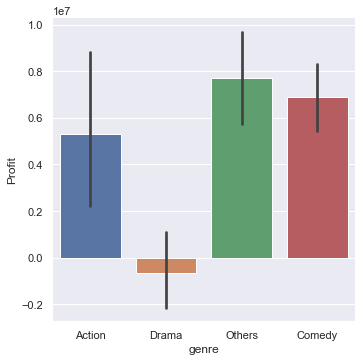

In [95]:
sns.factorplot(x ='genre', y = 'Profit',  kind = 'bar', data = Box_office_v2, size=5, aspect=1);

# Level down Stars

In [96]:
Box_office_v2.sort_values(by = ['Profit', 'ROI'], ascending = False, inplace = True, ignore_index = True)
top_50 = Box_office_v2.loc[0:50, 'star']
Box_office_v2['star_names'] = top_50

In [97]:
Box_office_v2['star_names'].unique()

array(['Sam Worthington', 'Chris Pratt', 'Leonardo DiCaprio',
       'Robert Downey Jr.', 'Ewan McGregor', 'Christian Bale',
       'Jim Caviezel', 'Sam Neill', 'Felicity Jones', 'Jennifer Lawrence',
       'Ryan Reynolds', 'Steve Carell', 'Bradley Cooper', 'Albert Brooks',
       'Mike Myers', 'Daniel Radcliffe', 'Tom Hanks', 'Matthew Broderick',
       'Hayden Christensen', 'Tobey Maguire', 'Sandra Bullock',
       'Bruce Willis', 'Kristen Bell', 'Kristen Stewart', 'Nia Vardalos',
       'Will Smith', 'Quinton Aaron', 'Elijah Wood', 'Michael Keaton',
       'Shia LaBeouf', 'Ben Stiller', 'Johnny Depp', 'Patrick Swayze',
       'Robin Williams', "Paige O'Hara", 'Ginnifer Goodwin',
       'Scott Weinger', 'Neel Sethi', 'Amy Poehler', nan], dtype=object)

In [98]:
Box_office_v2['star_names'] = Box_office_v2['star_names'].replace(to_replace =['Sam Worthington', 'Chris Pratt', 'Leonardo DiCaprio',
       'Robert Downey Jr.', 'Ewan McGregor', 'Christian Bale',
       'Jim Caviezel', 'Sam Neill', 'Felicity Jones', 'Jennifer Lawrence',
       'Ryan Reynolds', 'Steve Carell', 'Bradley Cooper', 'Albert Brooks',
       'Mike Myers', 'Daniel Radcliffe', 'Tom Hanks', 'Matthew Broderick',
       'Hayden Christensen', 'Tobey Maguire', 'Sandra Bullock',
       'Bruce Willis', 'Kristen Bell', 'Kristen Stewart', 'Nia Vardalos',
       'Will Smith', 'Quinton Aaron', 'Elijah Wood', 'Michael Keaton',
       'Shia LaBeouf', 'Ben Stiller', 'Johnny Depp', 'Patrick Swayze',
       'Robin Williams', "Paige O'Hara", 'Ginnifer Goodwin',
       'Scott Weinger', 'Neel Sethi', 'Amy Poehler'] ,  value ="Famous")

In [99]:
Box_office_v2['star_names'].fillna('Not-Famous', inplace = True)

In [100]:
Box_office_v2['star_names'].unique()

array(['Famous', 'Not-Famous'], dtype=object)

# Level down Studio

In [101]:
Box_office_v2.sort_values(by = ['Profit','ROI'], ascending = False, inplace = True, ignore_index = True)
top_50 = Box_office_v2.loc[0:50, 'studio']
Box_office_v2['studio_names'] = top_50

In [102]:
Box_office_v2['studio_names'].unique()

array(['Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Marvel Studios', 'Lucasfilm', 'Warner Bros.', 'Icon Productions',
       'Lionsgate', 'Color Force', 'Pixar Animation Studios',
       'DreamWorks', 'Paramount Pictures', 'Walt Disney Pictures',
       'Columbia Pictures Corporation', 'Illumination Entertainment',
       'Hollywood Pictures', 'Walt Disney Animation Studios',
       'Temple Hill Entertainment', 'Gold Circle Films',
       'Summit Entertainment', 'Alcon Entertainment', 'New Line Cinema',
       'Fairview Entertainment', nan], dtype=object)

In [103]:
Box_office_v2['studio_names'] = Box_office_v2['studio_names'].replace(to_replace =['Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Marvel Studios', 'Lucasfilm', 'Warner Bros.', 'Icon Productions',
       'Lionsgate', 'Color Force', 'Pixar Animation Studios',
       'DreamWorks', 'Paramount Pictures', 'Walt Disney Pictures',
       'Columbia Pictures Corporation', 'Illumination Entertainment',
       'Hollywood Pictures', 'Walt Disney Animation Studios',
       'Temple Hill Entertainment', 'Gold Circle Films',
       'Summit Entertainment', 'Alcon Entertainment', 'New Line Cinema',
       'Fairview Entertainment'] ,  value ="Top_Studio")


In [104]:
Box_office_v2['studio_names'].fillna('Low-Studio', inplace = True)

In [105]:
Box_office_v2['studio_names'].unique()

array(['Top_Studio', 'Low-Studio'], dtype=object)

# Plotting Cat Data

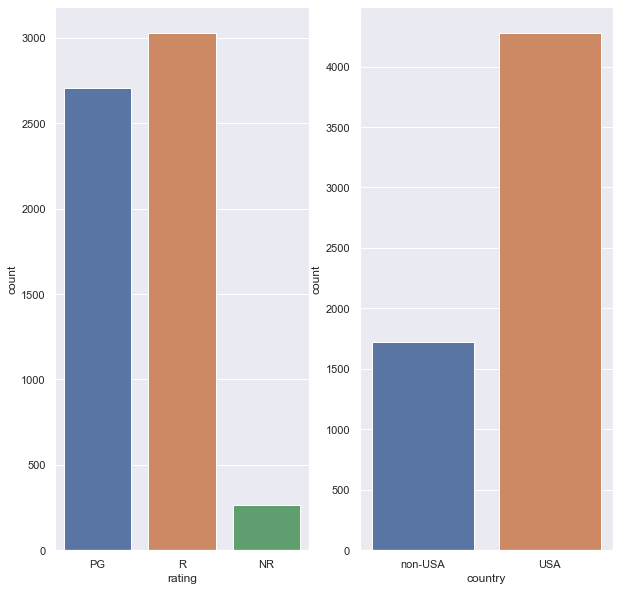

In [59]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

sns.countplot(x='rating', data= Box_office_v2, ax=axes[0]);
sns.countplot(x='country', data= Box_office_v2, ax=axes[1]);

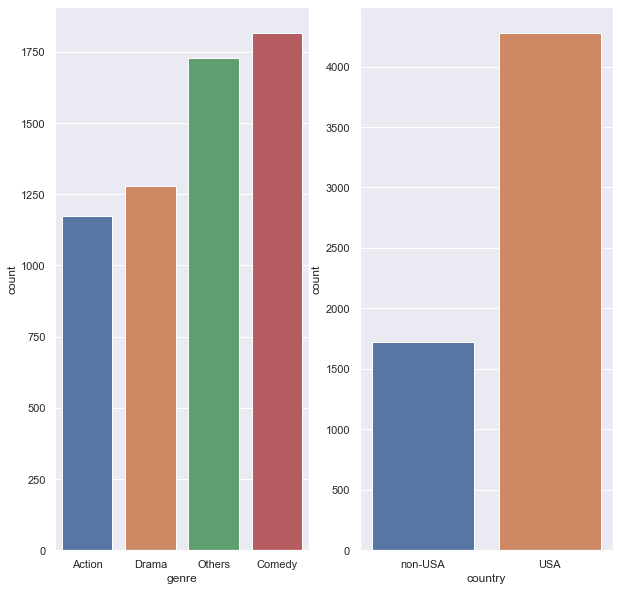

In [60]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
sns.countplot(x='genre', data= Box_office_v2, ax=axes[0]);
sns.countplot(x='country', data= Box_office_v2, ax=axes[1]);


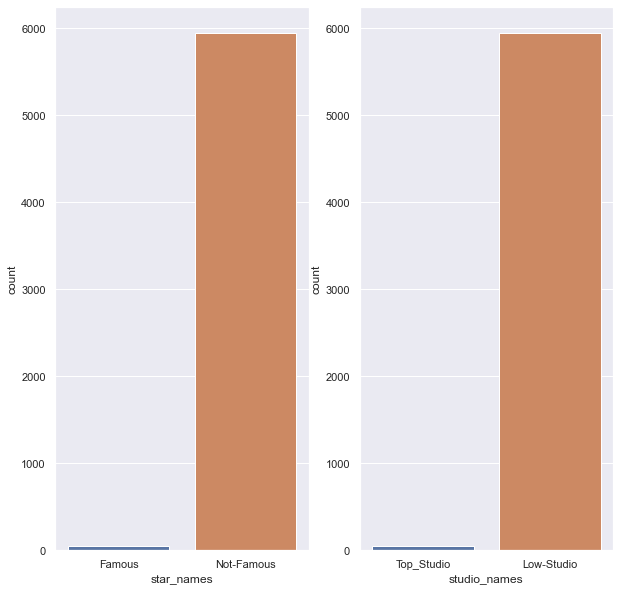

In [65]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
sns.countplot(x='star_names', data= Box_office_v2, ax=axes[0]);
sns.countplot(x='studio_names', data= Box_office_v2, ax=axes[1]);

# Deleting columns

In [106]:
Box_office_v2

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes,Profit,ROI,star_names,studio_names
0,237000000.0,non-USA,James Cameron,Action,760507625.0,Avatar (2009),PG,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,523507625.0,1,Famous,Top_Studio
1,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG,124,7.0,Chris Pratt,Universal Pictures,470625,502270625.0,1,Famous,Top_Studio
2,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,458672302.0,1,Famous,Top_Studio
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG,143,8.1,Robert Downey Jr.,Marvel Studios,1069292,403357910.0,1,Famous,Top_Studio
4,115000000.0,USA,George Lucas,Action,474544677.0,Star Wars: Episode I - The Phantom Menace (1999),PG,136,6.5,Ewan McGregor,Lucasfilm,587113,359544677.0,1,Famous,Top_Studio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,176000000.0,USA,Lana Wachowski,Action,47387723.0,Jupiter Ascending (2015),PG,127,5.3,Channing Tatum,Warner Bros.,154144,-128612277.0,0,Not-Famous,Low-Studio
5996,195000000.0,USA,Bryan Singer,Others,65187603.0,Jack the Giant Slayer (2013),PG,114,6.3,Nicholas Hoult,New Line Cinema,114307,-129812397.0,0,Not-Famous,Low-Studio
5997,175000000.0,USA,Carl Rinsch,Action,38362475.0,47 Ronin (2013),PG,119,6.3,Keanu Reeves,H2F Entertainment,126315,-136637525.0,0,Not-Famous,Low-Studio
5998,209000000.0,USA,Peter Berg,Action,65422625.0,Battleship (2012),PG,131,5.8,Alexander Skarsgård,Universal Pictures,214631,-143577375.0,0,Not-Famous,Low-Studio


In [107]:
to_delete = ['director', 'name' , 'runtime' ,'Profit','star','studio']

In [108]:
Box_office_v2 = Box_office_v2.drop(to_delete, axis = 1 )

In [109]:
Box_office_v2

,budget,country,genre,gross,rating,score,votes,ROI,star_names,studio_names
0,237000000.0,non-USA,Action,760507625.0,PG,7.8,958400,1,Famous,Top_Studio
1,150000000.0,USA,Action,652270625.0,PG,7.0,470625,1,Famous,Top_Studio
2,200000000.0,USA,Drama,658672302.0,PG,7.8,865551,1,Famous,Top_Studio
3,220000000.0,USA,Action,623357910.0,PG,8.1,1069292,1,Famous,Top_Studio
4,115000000.0,USA,Action,474544677.0,PG,6.5,587113,1,Famous,Top_Studio
...,...,...,...,...,...,...,...,...,...,...
5995,176000000.0,USA,Action,47387723.0,PG,5.3,154144,0,Not-Famous,Low-Studio
5996,195000000.0,USA,Others,65187603.0,PG,6.3,114307,0,Not-Famous,Low-Studio
5997,175000000.0,USA,Action,38362475.0,PG,6.3,126315,0,Not-Famous,Low-Studio
5998,209000000.0,USA,Action,65422625.0,PG,5.8,214631,0,Not-Famous,Low-Studio


In [110]:
Box_office_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        6000 non-null   float64
 1   country       6000 non-null   object 
 2   genre         6000 non-null   object 
 3   gross         6000 non-null   float64
 4   rating        6000 non-null   object 
 5   score         6000 non-null   float64
 6   votes         6000 non-null   int64  
 7   ROI           6000 non-null   int64  
 8   star_names    6000 non-null   object 
 9   studio_names  6000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 468.9+ KB


In [111]:
Box_office_v2.to_csv('Box_office_v2.csv')

In [112]:
Box_office_v2.describe(include=['object', 'bool', 'category'])

,country,genre,rating,star_names,studio_names
count,6000,6000,6000,6000,6000
unique,2,4,3,2,2
top,USA,Comedy,R,Not-Famous,Low-Studio
freq,4281,1818,3030,5949,5949


In [113]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [114]:
Box_office_v3= pd.read_csv('Box_office_v2.csv')
Box_office_v3.head()

,Unnamed: 0,budget,country,genre,gross,rating,score,votes,ROI,star_names,studio_names
0,0,237000000.0,non-USA,Action,760507625.0,PG,7.8,958400,1,Famous,Top_Studio
1,1,150000000.0,USA,Action,652270625.0,PG,7.0,470625,1,Famous,Top_Studio
2,2,200000000.0,USA,Drama,658672302.0,PG,7.8,865551,1,Famous,Top_Studio
3,3,220000000.0,USA,Action,623357910.0,PG,8.1,1069292,1,Famous,Top_Studio
4,4,115000000.0,USA,Action,474544677.0,PG,6.5,587113,1,Famous,Top_Studio


In [115]:
 Box_office_v3= Box_office_v3.drop('Unnamed: 0', axis = 1)

In [116]:
Box_office_v3.head()

,budget,country,genre,gross,rating,score,votes,ROI,star_names,studio_names
0,237000000.0,non-USA,Action,760507625.0,PG,7.8,958400,1,Famous,Top_Studio
1,150000000.0,USA,Action,652270625.0,PG,7.0,470625,1,Famous,Top_Studio
2,200000000.0,USA,Drama,658672302.0,PG,7.8,865551,1,Famous,Top_Studio
3,220000000.0,USA,Action,623357910.0,PG,8.1,1069292,1,Famous,Top_Studio
4,115000000.0,USA,Action,474544677.0,PG,6.5,587113,1,Famous,Top_Studio


# One-Hot Encoding

In [117]:
Box_office_copy = Box_office_v3.copy()
Box_office_copy

,budget,country,genre,gross,rating,score,votes,ROI,star_names,studio_names
0,237000000.0,non-USA,Action,760507625.0,PG,7.8,958400,1,Famous,Top_Studio
1,150000000.0,USA,Action,652270625.0,PG,7.0,470625,1,Famous,Top_Studio
2,200000000.0,USA,Drama,658672302.0,PG,7.8,865551,1,Famous,Top_Studio
3,220000000.0,USA,Action,623357910.0,PG,8.1,1069292,1,Famous,Top_Studio
4,115000000.0,USA,Action,474544677.0,PG,6.5,587113,1,Famous,Top_Studio
...,...,...,...,...,...,...,...,...,...,...
5995,176000000.0,USA,Action,47387723.0,PG,5.3,154144,0,Not-Famous,Low-Studio
5996,195000000.0,USA,Others,65187603.0,PG,6.3,114307,0,Not-Famous,Low-Studio
5997,175000000.0,USA,Action,38362475.0,PG,6.3,126315,0,Not-Famous,Low-Studio
5998,209000000.0,USA,Action,65422625.0,PG,5.8,214631,0,Not-Famous,Low-Studio


In [118]:
data_column_category = Box_office_copy.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['country', 'genre', 'rating', 'star_names', 'studio_names'], dtype='object')

In [119]:
#Performing Onehot Encoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoded = onehot_encoder.fit_transform(Box_office_copy[data_column_category])

In [120]:
onehot_encoded_frame = pd.DataFrame(onehot_encoded, columns = onehot_encoder.get_feature_names(data_column_category))

onehot_encoded_frame.head()

,country_USA,country_non-USA,genre_Action,genre_Comedy,genre_Drama,genre_Others,rating_NR,rating_PG,rating_R,star_names_Famous,star_names_Not-Famous,studio_names_Low-Studio,studio_names_Top_Studio
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [121]:
cols_types = Box_office_copy.dtypes != 'object'
inds = cols_types.index
numeric_cols = []
for i, col in enumerate(cols_types):
    if col:
        numeric_cols.append(inds[i])
numeric_cols

['budget', 'gross', 'score', 'votes', 'ROI']

In [122]:
numeric_cols =  Box_office_copy.loc[:, numeric_cols]

In [123]:
onehot_encoded_frame.columns

Index(['country_USA', 'country_non-USA', 'genre_Action', 'genre_Comedy',
       'genre_Drama', 'genre_Others', 'rating_NR', 'rating_PG', 'rating_R',
       'star_names_Famous', 'star_names_Not-Famous', 'studio_names_Low-Studio',
       'studio_names_Top_Studio'],
      dtype='object')

# Concatenate Cat & Transformed One-Hot encoded data

In [124]:
Box_office_copy = pd.concat([numeric_cols,onehot_encoded_frame], axis=1, sort= False)
Box_office_copy

,budget,gross,score,votes,ROI,country_USA,country_non-USA,genre_Action,genre_Comedy,genre_Drama,genre_Others,rating_NR,rating_PG,rating_R,star_names_Famous,star_names_Not-Famous,studio_names_Low-Studio,studio_names_Top_Studio
0,237000000.0,760507625.0,7.8,958400,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,150000000.0,652270625.0,7.0,470625,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,200000000.0,658672302.0,7.8,865551,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,220000000.0,623357910.0,8.1,1069292,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,115000000.0,474544677.0,6.5,587113,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,176000000.0,47387723.0,5.3,154144,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5996,195000000.0,65187603.0,6.3,114307,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5997,175000000.0,38362475.0,6.3,126315,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5998,209000000.0,65422625.0,5.8,214631,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [125]:
Box_office_copy.shape

(6000, 18)

# Saving V3

In [126]:
 Box_office_copy.to_csv("Box_office_v3.csv")

In [127]:
Box_office_v3 = pd.read_csv('Box_office_v3.csv')
Box_office_v3.head()

,Unnamed: 0,budget,gross,score,votes,ROI,country_USA,country_non-USA,genre_Action,genre_Comedy,genre_Drama,genre_Others,rating_NR,rating_PG,rating_R,star_names_Famous,star_names_Not-Famous,studio_names_Low-Studio,studio_names_Top_Studio
0,0,237000000.0,760507625.0,7.8,958400,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,150000000.0,652270625.0,7.0,470625,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2,200000000.0,658672302.0,7.8,865551,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,3,220000000.0,623357910.0,8.1,1069292,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,4,115000000.0,474544677.0,6.5,587113,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [128]:
Box_office_v3 =Box_office_v3.drop('Unnamed: 0', axis = 1)

# Feature Selection

In [129]:
Box_office_v3_copy = Box_office_v3.copy()
Box_office_v3_copy.shape

(6000, 18)

In [130]:
 X = Box_office_v3_copy.drop('ROI', axis = 1)
 y = Box_office_v3_copy.ROI

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(Box_office_v3_copy.drop('ROI', axis = 1),
                                               Box_office_v3_copy.ROI,
                                               test_size = .2,
                                               random_state=12)

In [131]:
X.shape

(6000, 17)

In [132]:
y.shape

(6000,)

# XGBoost

In [133]:
#import XGBoost classifier and accuracy
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#instantiate model and train
model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
model.fit(X, y)

# make predictions for test set
y_pred = model.predict(test_features)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(test_target, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[16:42:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 100.00%


[16:42:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


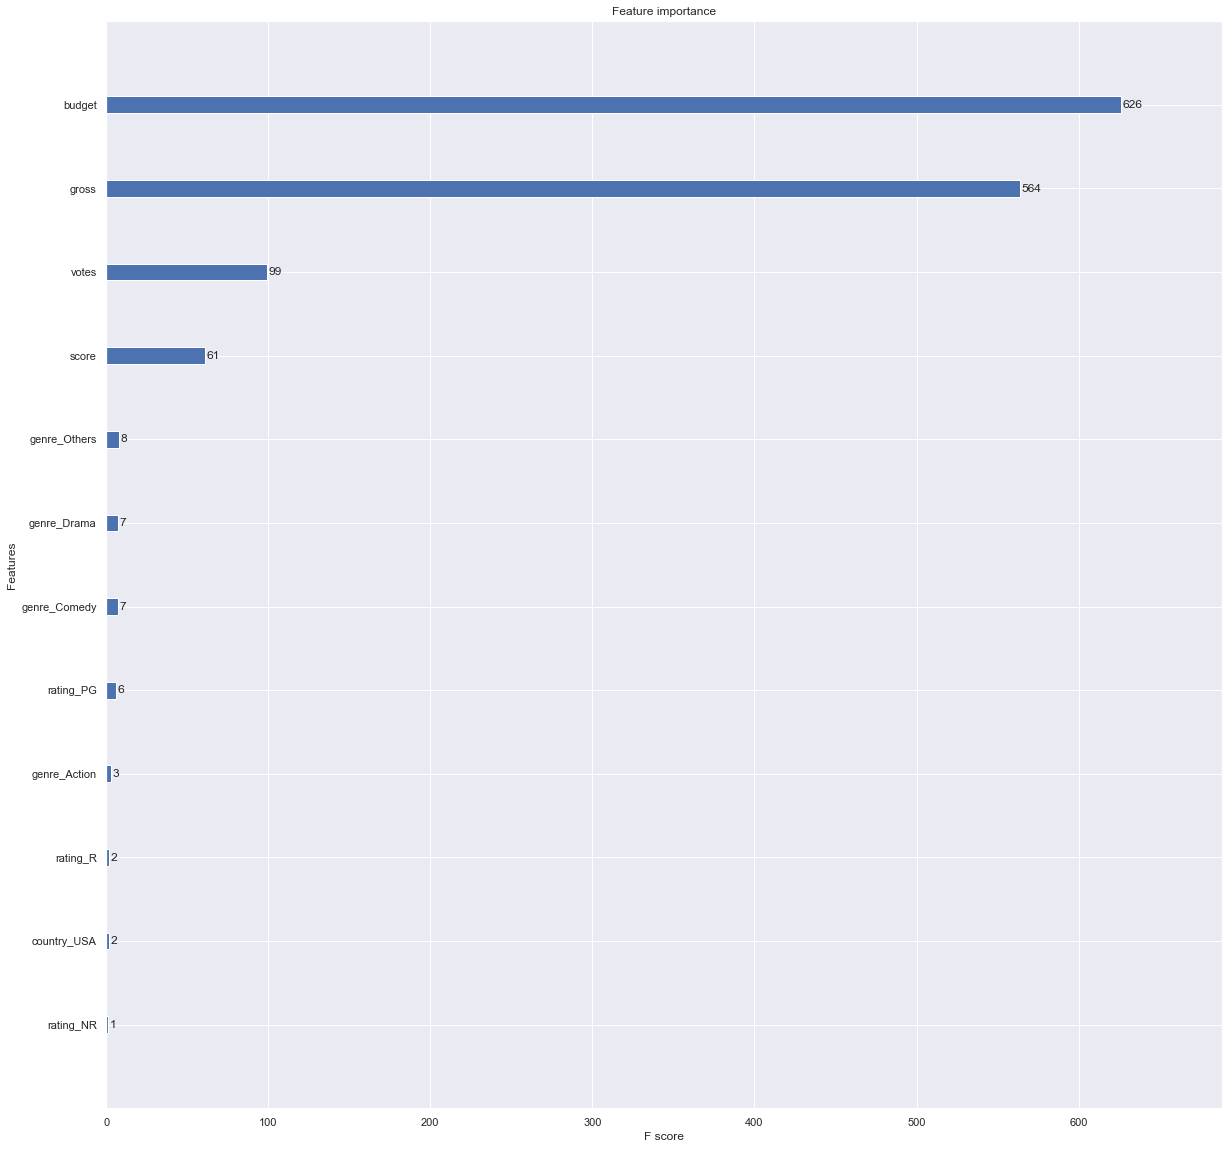

In [134]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# load data
dataset = 'Box_office_v3_copy'
# split data into X and y
# X = dataset[:,0:8]
# y = dataset[:,8]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

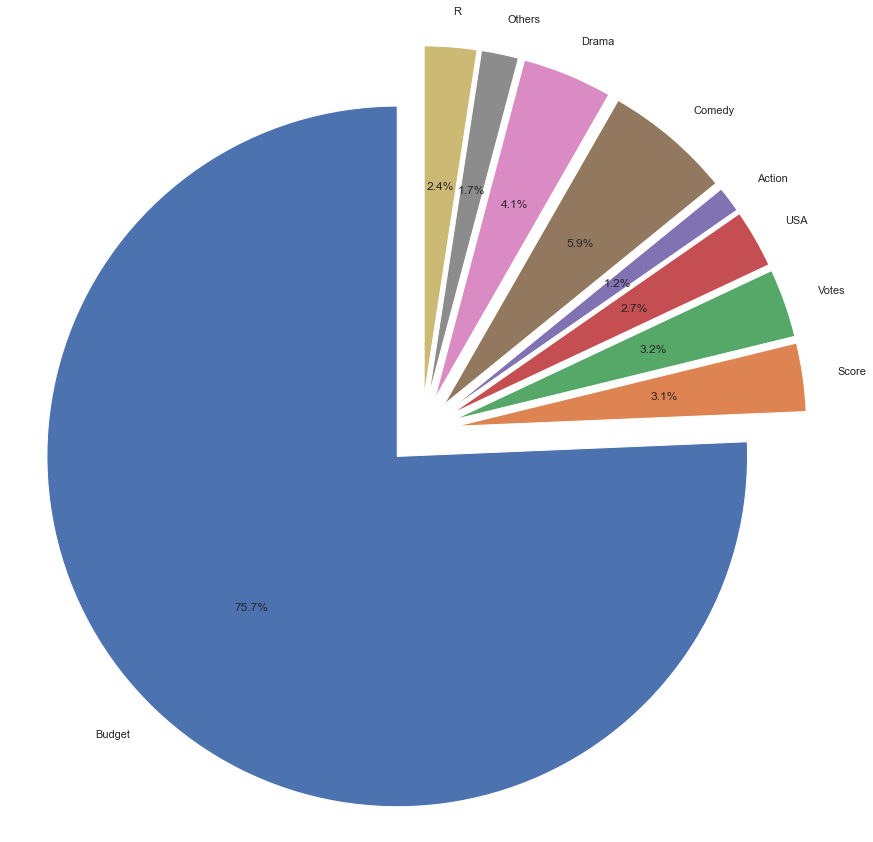

In [135]:
import matplotlib.pyplot as plt

labels = 'Budget','Score','Votes','USA','Action','Comedy' ,'Drama', 'Others', 'R'
sizes = [31,1.29, 1.3, 1.1,0.49, 2.4,1.7, 0.7, 0.99]
explode = (0.1,0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels= labels, autopct = '%1.1f%%', startangle = 90)
ax1.axis('equal')
fig1.set_size_inches(15,15)

plt.show()

In [137]:
feature_importances = pd.DataFrame({'Importance Coef' :model.feature_importances_ , 'Features' : X.columns})
#feature_importances.nlargest(135, 'Importance Coef')


In [138]:
feature_importances.sort_values(by=['Importance Coef'], ascending = False)

,Importance Coef,Features
1,0.640464,gross
0,0.265606,budget
4,0.014572,country_USA
10,0.012932,rating_NR
7,0.012301,genre_Comedy
2,0.010730,score
3,0.010534,votes
9,0.009666,genre_Others
8,0.009437,genre_Drama
6,0.006026,genre_Action


In [139]:
to_delete= ['rating_R','genre_Others','genre_Action','country_non-USA','rating_NR','rating_PG','star_names_Famous','star_names_Not-Famous','studio_names_Low-Studio','studio_names_Top_Studio']
Box_office_v3_copy = Box_office_v3_copy.drop(to_delete, axis=1)

In [140]:
Box_office_v3_copy.head()

,budget,gross,score,votes,ROI,country_USA,genre_Comedy,genre_Drama
0,237000000.0,760507625.0,7.8,958400,1,0.0,0.0,0.0
1,150000000.0,652270625.0,7.0,470625,1,1.0,0.0,0.0
2,200000000.0,658672302.0,7.8,865551,1,1.0,0.0,1.0
3,220000000.0,623357910.0,8.1,1069292,1,1.0,0.0,0.0
4,115000000.0,474544677.0,6.5,587113,1,1.0,0.0,0.0


# Saving XGBoost

In [141]:
Box_office_v3_copy.to_csv("Box_office_v3_featureSelection.csv")

In [142]:
Box_office_v3 = pd.read_csv('Box_office_v3_featureSelection.csv')
Box_office_v3.head()

,Unnamed: 0,budget,gross,score,votes,ROI,country_USA,genre_Comedy,genre_Drama
0,0,237000000.0,760507625.0,7.8,958400,1,0.0,0.0,0.0
1,1,150000000.0,652270625.0,7.0,470625,1,1.0,0.0,0.0
2,2,200000000.0,658672302.0,7.8,865551,1,1.0,0.0,1.0
3,3,220000000.0,623357910.0,8.1,1069292,1,1.0,0.0,0.0
4,4,115000000.0,474544677.0,6.5,587113,1,1.0,0.0,0.0


In [143]:
Box_office_v3 =Box_office_v3.drop('Unnamed: 0', axis = 1)

# Fixing Skewness

In [144]:
num_feast = Box_office_v3.dtypes[Box_office_v3.dtypes!= 'object'].index
skew_feats = Box_office_v3[num_feast].skew().sort_values(ascending = False)
skweness = pd.DataFrame({'Skew': skew_feats})
skweness

,Skew
votes,4.831332
gross,3.901426
budget,2.851542
genre_Drama,1.399881
genre_Comedy,0.857565
ROI,0.428260
score,-0.620615
country_USA,-0.944664


# Fixing Budget

<AxesSubplot:xlabel='budget'>

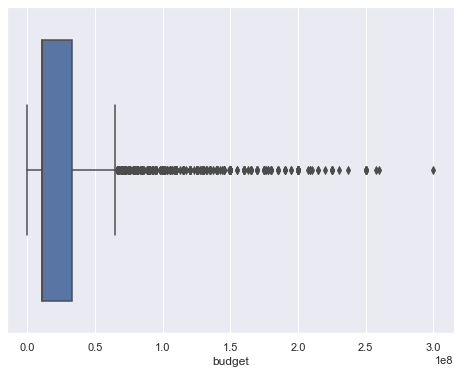

In [145]:
#### Remove outliers
plt.figure(figsize=(8,6))
import seaborn as sns
sns.boxplot(x=Box_office_v3['budget'])

In [146]:
resp = Box_office_v3['budget']
from scipy.stats import shapiro
shapiro(resp)[1]

0.0

# Square Root

<AxesSubplot:xlabel='budget', ylabel='Density'>

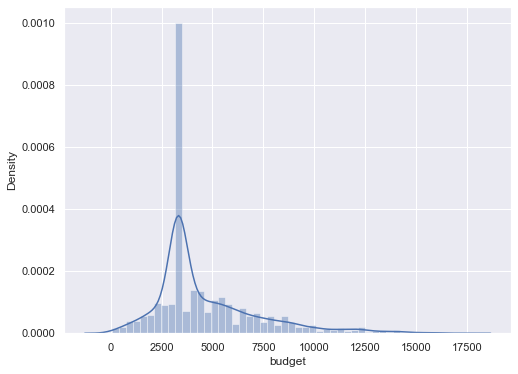

In [147]:
plt.figure(figsize=(8,6))
sqrt_resp = resp ** (.5)
sns.distplot(sqrt_resp)

# Fixing Gross

<AxesSubplot:xlabel='gross'>

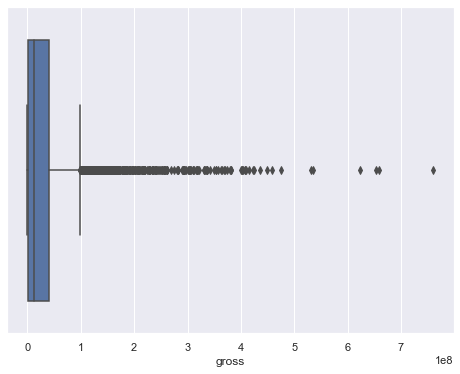

In [148]:
plt.figure(figsize=(8,6))
import seaborn as sns
sns.boxplot(x=Box_office_v3['gross'])

In [149]:
resp = Box_office_v3['gross']
from scipy.stats import shapiro
shapiro(resp)[1]

0.0

<AxesSubplot:xlabel='gross', ylabel='Density'>

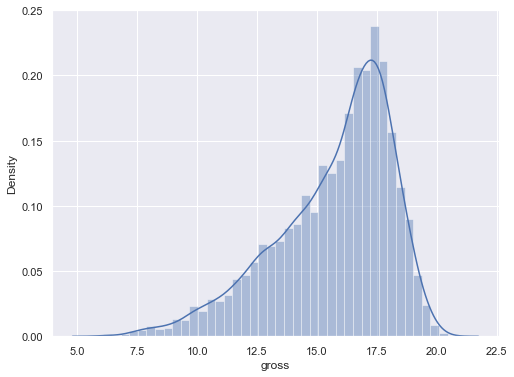

In [150]:
plt.figure(figsize=(8,6))
log_resp = np.log(resp)
sns.distplot(log_resp)

# Fixing Score

<AxesSubplot:xlabel='score'>

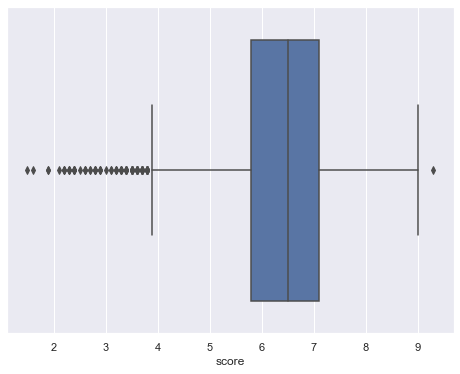

In [151]:
plt.figure(figsize=(8,6))
import seaborn as sns
sns.boxplot(x=Box_office_v3['score'])

In [ ]:
resp = Box_office_v3['score']
from scipy.stats import shapiro
shapiro(resp)[1]


<AxesSubplot:xlabel='score', ylabel='Density'>

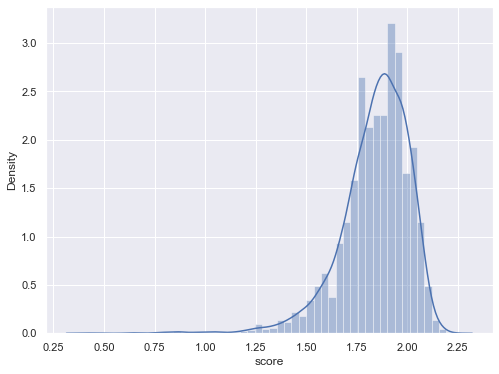

In [153]:
plt.figure(figsize=(8,6))
log_resp = np.log(resp)
sns.distplot(log_resp)

# Fixing Votes

<AxesSubplot:xlabel='votes'>

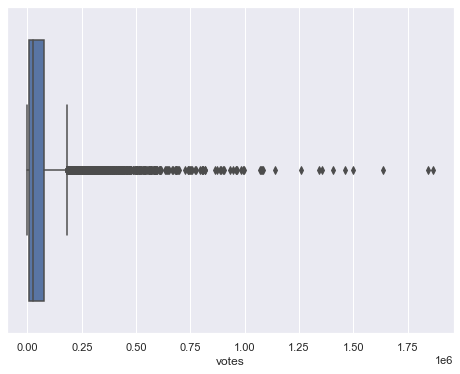

In [154]:
plt.figure(figsize=(8,6))
import seaborn as sns
sns.boxplot(x=Box_office_v3['votes'])

In [155]:
resp = Box_office_v3['votes']
from scipy.stats import shapiro
shapiro(resp)[1]

0.0

<AxesSubplot:xlabel='votes', ylabel='Density'>

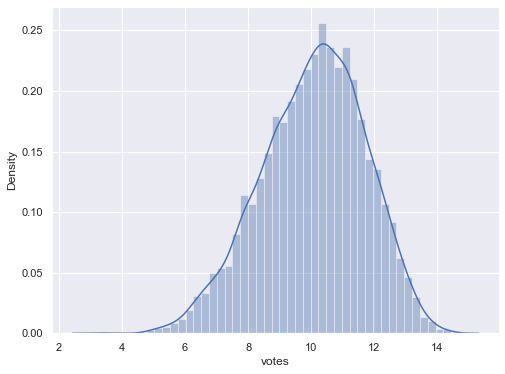

In [156]:
plt.figure(figsize=(8,6))
log_resp = np.log(resp)
sns.distplot(log_resp)

# Saving Transformed values

In [157]:
Box_office_v3['square_root_budget'] = np.log(Box_office_v3['budget'])

In [158]:
Box_office_v3['log_trans_gross'] = np.log(Box_office_v3['gross'])

In [159]:
Box_office_v3['log_trans_score'] = np.log(Box_office_v3['score'])

In [160]:
Box_office_v3['log_trans_votes'] = np.log(Box_office_v3['votes'])

# View & delete old, not transformed columns

In [161]:
Box_office_v3.columns

Index(['budget', 'gross', 'score', 'votes', 'ROI', 'country_USA',
       'genre_Comedy', 'genre_Drama', 'square_root_budget', 'log_trans_gross',
       'log_trans_score', 'log_trans_votes'],
      dtype='object')

In [162]:
Box_office_v3_copy = Box_office_v3[['country_USA',
       'genre_Comedy', 'genre_Drama', 'square_root_budget', 'log_trans_gross',
       'log_trans_score', 'log_trans_votes','ROI']]

In [163]:
Box_office_v3_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_USA         6000 non-null   float64
 1   genre_Comedy        6000 non-null   float64
 2   genre_Drama         6000 non-null   float64
 3   square_root_budget  6000 non-null   float64
 4   log_trans_gross     6000 non-null   float64
 5   log_trans_score     6000 non-null   float64
 6   log_trans_votes     6000 non-null   float64
 7   ROI                 6000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 375.1 KB


# Saving Transformed(skewness fixed) & Feature Selection file

In [164]:
Box_office_v3_copy.to_csv("Box_office_v3_ready2Scale.csv")

In [165]:
Box_office_v3 = pd.read_csv('Box_office_v3_ready2Scale.csv')
Box_office_v3.head()

,Unnamed: 0,country_USA,genre_Comedy,genre_Drama,square_root_budget,log_trans_gross,log_trans_score,log_trans_votes,ROI
0,0,0.0,0.0,0.0,19.283571,20.449497,2.054124,13.773021,1
1,1,1.0,0.0,0.0,18.826146,20.295970,1.945910,13.061817,1
2,2,1.0,0.0,1.0,19.113828,20.305737,2.054124,13.671122,1
3,3,1.0,0.0,0.0,19.209138,20.250631,2.091864,13.882507,1
4,4,1.0,0.0,0.0,18.560443,19.977866,1.871802,13.282973,1


In [166]:
Box_office_v3 =Box_office_v3.drop('Unnamed: 0', axis = 1)

# Modeling

In [167]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree


from sklearn.preprocessing import StandardScaler
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import model_selection

In [172]:
Box_officeV3 = pd.read_csv("Box_office_v3_ready2Scale.csv")
Box_officeV3.head()
Box_officeV3 = Box_officeV3.drop('Unnamed: 0', axis = 1)

In [173]:
from sklearn.model_selection import train_test_split
X = Box_officeV3.drop('ROI', axis = 1)
y = Box_officeV3.ROI

training_features, test_features, \
training_target, test_target, = train_test_split(X,y, test_size = .2, random_state= 45)

# Scaling

In [174]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
training_features = robust_scaler.fit_transform(training_features)
test_features = robust_scaler.transform(test_features)
training_features

array([[-1.        ,  0.        ,  0.        , ...,  0.07656404,
        -2.92166479,  0.12796572],
       [ 0.        ,  0.        ,  0.        , ..., -0.04638599,
        -0.64941672,  0.28323361],
       [ 0.        ,  1.        ,  0.        , ...,  0.03574503,
        -0.31405454, -0.03063736],
       ...,
       [-1.        ,  1.        ,  0.        , ..., -1.51136809,
         0.43658018, -0.10709121],
       [ 0.        ,  1.        ,  0.        , ..., -0.61848658,
        -0.64941672, -0.64315895],
       [-1.        ,  0.        ,  0.        , ..., -0.19080692,
         0.36644146,  0.15424561]])

# Baseline

In [175]:
dummy_baseline = DummyClassifier(strategy="most_frequent")

dummy_baseline.fit(test_features, test_target)

DummyClassifier(strategy='most_frequent')

In [176]:
test_target_pred = dummy_baseline.predict(test_features)
print(test_target_pred)

[0 0 0 ... 0 0 0]


In [177]:
score = dummy_baseline.score(test_features, test_target)
print('The fraction of correct classifications is: {:5.3f}'.format(score))

The fraction of correct classifications is: 0.592


In [178]:
# This is the long way of computing the accuracy score
dummy_baselineCM = confusion_matrix(test_target,test_target_pred)
dummy_baselineCM

array([[710,   0],
       [490,   0]])

In [179]:
Box_officeV3['ROI'].value_counts(normalize=True)

0    0.604667
1    0.395333
Name: ROI, dtype: float64

# Decision Tree

In [180]:
DecisionTreeModel = DecisionTreeClassifier(criterion='entropy', random_state=45  , max_depth=4)

In [181]:
%%time
DecisionTreeModel.fit(training_features, training_target)  # Training input and its Target variables

CPU times: user 12.4 ms, sys: 2.37 ms, total: 14.8 ms
Wall time: 14.6 ms


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=45)

In [182]:
%%time
DTPred = DecisionTreeModel.predict(test_features)

CPU times: user 1.16 ms, sys: 795 µs, total: 1.95 ms
Wall time: 1.5 ms


In [183]:
# Confusion Matrix
#from sklearn.model_selection import cross_val_score, cross_valPredict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [184]:
# Confusion Matrix
CMTD = confusion_matrix(test_target,DTPred) # Compare the predicted target varaible to the orginal target variable
CMTD

array([[652,  58],
       [ 81, 409]])

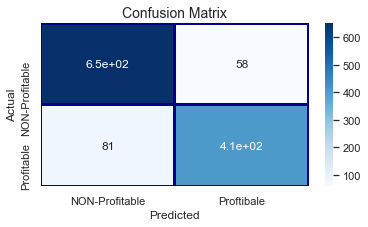

In [185]:
target ='ROI'
CMTD = pd.crosstab(test_target,DTPred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,3))
sns.heatmap(CMTD, 
            xticklabels=['NON-Profitable', 'Proftibale'],
            yticklabels=['NON-Profitable', 'Profitable'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

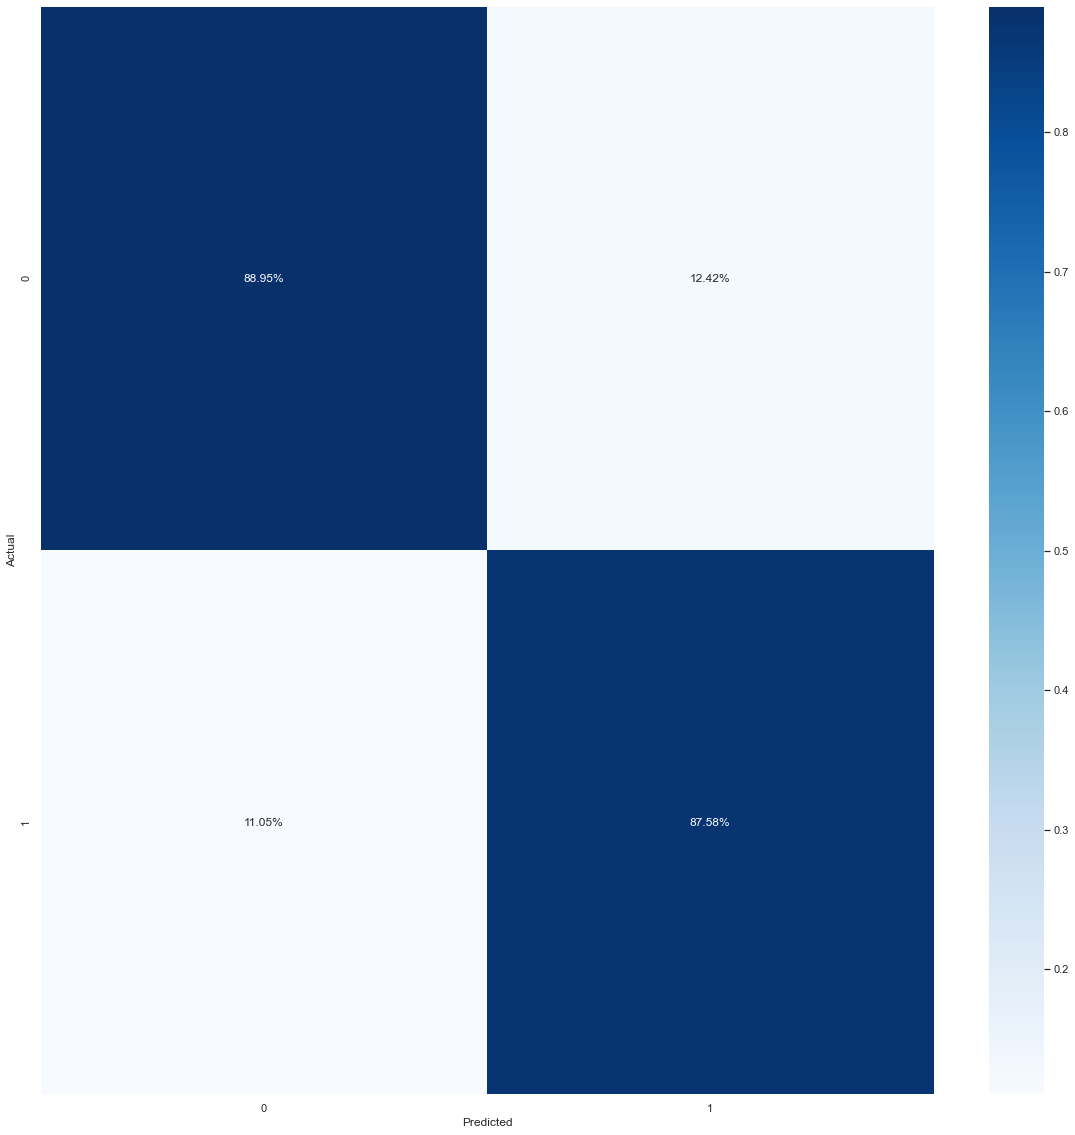

In [186]:
sns.heatmap(CMTD/np.sum(CMTD), annot=True, 
            fmt='.2%', cmap='Blues')

In [187]:
# Accuracy Score
ADT= accuracy_score(test_target, DTPred)

print(" Decision Tree Prediction Accuracy : {:.2f}%".format(ADT * 100))
# print()


 Decision Tree Prediction Accuracy : 88.42%


# Naive Bayes

In [188]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB

NBModel = GaussianNB()

NBModel.fit(training_features, training_target)

GaussianNB()

In [189]:
%%time

# Predicting the Test set results
NBPred = NBModel.predict(test_features)

CPU times: user 1.17 ms, sys: 583 µs, total: 1.75 ms
Wall time: 1.22 ms


In [190]:
# Making the Confusion Matrix
CMNB= confusion_matrix(test_target, NBPred)
CMNB

array([[556, 154],
       [ 94, 396]])

In [191]:
# Accuracy Score
ACNB= accuracy_score(test_target, NBPred)

print(" NB Prediction Accuracy : {:.2f}%".format(ACNB * 100))
# print()

 NB Prediction Accuracy : 79.33%


# Logistic Regression

In [192]:
# Create the model using LogisticRegression class
LRModel = LogisticRegression(random_state = 45) # SEED. IN R

In [193]:
# Fitting the Model
LRModel.fit(training_features, training_target)

LogisticRegression(random_state=45)

In [194]:
%%time

# Predicting the Test set results

LRPred =LRModel.predict(test_features)

CPU times: user 957 µs, sys: 884 µs, total: 1.84 ms
Wall time: 1.6 ms


In [195]:
# Making the Confusion Matrix
CMLR= confusion_matrix(test_target, LRPred)
CMLR

array([[705,   5],
       [  4, 486]])

In [196]:
#Accuracy Score
ACLR= accuracy_score(test_target, LRPred )

print(" LGR Prediction Accuracy : {:.2f}%".format(ACLR * 100))

 LGR Prediction Accuracy : 99.25%


# SVM

In [197]:
from sklearn.model_selection import train_test_split
X = Box_officeV3.drop('ROI', axis = 1)
y = Box_officeV3.ROI

training_features, test_features, \
training_target, test_target, = train_test_split(X,y, test_size = .2, random_state= 45)

In [198]:
robust_scaler = RobustScaler()
training_features = robust_scaler.fit_transform(training_features)
test_features = robust_scaler.transform(test_features)

In [199]:
SVMModel = SVC(kernel = 'linear', random_state = 45,probability = True)

In [200]:
SVMModel.fit(training_features, training_target)

SVC(kernel='linear', probability=True, random_state=45)

In [201]:
%%time

# Predicting the Test set results
SVMPred = SVMModel.predict(test_features)

CPU times: user 14.5 ms, sys: 1.84 ms, total: 16.3 ms
Wall time: 15.8 ms


In [202]:
# Making the Confusion Matrix
CMSVM= confusion_matrix(test_target, SVMPred)
CMSVM

array([[705,   5],
       [  2, 488]])

In [203]:
# Accuracy Score
ACSVM= accuracy_score(test_target, SVMPred )

print(" SVM Prediction Accuracy : {:.2f}%".format(ACSVM * 100))

 SVM Prediction Accuracy : 99.42%


# KSVM

In [204]:
KSVMModel = SVC(kernel = 'rbf', random_state = 0,probability = True)
KSVMModel.fit(training_features, training_target)

SVC(probability=True, random_state=0)

In [205]:
%%time

# Predicting the Test set results
KSVMPred = KSVMModel.predict(test_features)

CPU times: user 48.1 ms, sys: 2.43 ms, total: 50.6 ms
Wall time: 51.2 ms


In [206]:
# Making the Confusion Matrix
CMKSVM = confusion_matrix(test_target, KSVMPred)
CMKSVM

array([[695,  15],
       [ 19, 471]])

In [207]:
# Accuracy Score
ACKSVM= accuracy_score(test_target, KSVMPred)
print(ACKSVM)

0.9716666666666667


# KNN

In [208]:
KNNModel = KNeighborsClassifier(n_neighbors = 21)

KNNModel.fit(training_features, training_target)

KNeighborsClassifier(n_neighbors=21)

In [209]:
%%time

# Predicting the Test set results

KNNpred = KNNModel.predict(test_features)

CPU times: user 133 ms, sys: 4.19 ms, total: 137 ms
Wall time: 144 ms


In [210]:
# Confusion Matrix
CMKNN = confusion_matrix(test_target,KNNpred)
CMKNN

array([[665,  45],
       [ 66, 424]])

In [211]:
# Accuracy Score
ACKNN= accuracy_score(test_target, KNNpred )
print(ACKNN)

0.9075


# Ensemble

# Random Forest

In [212]:
RFModel = RandomForestClassifier( n_estimators = 109, max_features= 7, oob_score= True, random_state= 42)

RFModel.fit(training_features, training_target)

RandomForestClassifier(max_features=7, n_estimators=109, oob_score=True,
                       random_state=42)

In [213]:
# Predicting the Test set results
RFPred = RFModel.predict(test_features)

In [214]:
# Making the Confusion Matrix
CMRF= confusion_matrix(test_target, RFPred)
CMRF

array([[702,   8],
       [ 11, 479]])

In [215]:
# Accuracy Score
ACRF= accuracy_score(test_target, RFPred )
print(ACRF)

0.9841666666666666


# Out-of-Bag

In [216]:
RFModel.fit(training_features, training_target)
print('Training Accuracy:\t\t',ACRF)
print('Validation Accuracy(OOB Score):\t',RFModel.oob_score_)
print('Testing Accuracy:\t\t',RFModel.score(test_features , test_target))
print('Accuracy Difference:\t\t', RFModel.oob_score_ - RFModel.score(test_features , test_target))
#round(RFModel2.abs(ans6b - ans6c),4)

Training Accuracy:		 0.9841666666666666
Validation Accuracy(OOB Score):	 0.9877083333333333
Testing Accuracy:		 0.9841666666666666
Accuracy Difference:		 0.003541666666666665


In [217]:
RFModel.oob_score_

0.9877083333333333

# Bagging

In [218]:
BModel = BaggingClassifier(tree.DecisionTreeClassifier(random_state=45), n_estimators = 109)
BModel

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=45),
                  n_estimators=109)

In [219]:
BModel.fit(training_features, training_target)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=45),
                  n_estimators=109)

In [220]:
# Predicting the Test set results
BaggPred = BModel.predict(test_features)

In [221]:
# Making the Confusion Matrix
CMBagg= confusion_matrix(test_target, BaggPred)
CMBagg 
#keeps changing

array([[703,   7],
       [ 13, 477]])

In [222]:
# Accuracy Score
ACBagg= accuracy_score(test_target, BaggPred )
print(ACBagg)

0.9833333333333333


# ADA Boost

In [223]:
ADBModel = AdaBoostClassifier(random_state=42 , n_estimators=  53, learning_rate = .7, algorithm = 'SAMME.R') 
ADBModel.fit(training_features, training_target)

AdaBoostClassifier(learning_rate=0.7, n_estimators=53, random_state=42)

In [224]:
# Predicting the Test set results
ADBPred = ADBModel.predict(test_features)

In [225]:
# Making the Confusion Matrix
CMADB= confusion_matrix(test_target, ADBPred)
CMADB

array([[687,  23],
       [ 13, 477]])

In [226]:
# Accuracy Score
ACADB= accuracy_score(test_target, ADBPred )
print(ACADB)

0.97


# Gradient Boosting

In [227]:
# Initialize boosted tree
GBModel = GradientBoostingClassifier()

# Fit boosted tree
GBModel.fit(training_features, training_target)

GradientBoostingClassifier()

In [228]:
# Predicting the Test set results
GBPred = GBModel.predict(test_features)

In [229]:
# Making the Confusion Matrix
CMGB= confusion_matrix(test_target, GBPred)
CMGB

array([[697,  13],
       [ 18, 472]])

In [230]:
# Accuracy Score
ACGB= accuracy_score(test_target, GBPred )
print(ACGB)

0.9741666666666666


# XGBoost

In [239]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(training_features, training_target)

[17:18:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [240]:
XGB_training_score = XGB.score(training_features, training_target)
print(XGB_training_score)

0.9997916666666666


In [241]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = XGB.predict(test_features)
cm = confusion_matrix(test_target, y_pred)
print(cm)
XGB_score = accuracy_score(test_target, y_pred)
print(XGB_score)

[[703   7]
 [ 13 477]]
0.9833333333333333


# Model Comparison

In [242]:
# Accuracy Score
print(" Random Prediction on frequency                            : {:.2f}%".format(score * 100))
print(" Decision Tree Prediction Accuracy                         : {:.2f}%".format(ADT * 100))
print(" Naive Byes Prediction Accuracy                            : {:.2f}%".format(ACNB    *   100))
print(" Logistic Regression Prediction Accuracy                   : {:.2f}%".format(ACLR    *   100))
print(" Support Vector Machine Prediction Accuracy                : {:.2f}%".format(ACSVM   *   100))
print(" K-Support Vector Machine Prediction Accuracy              : {:.2f}%".format(ACKSVM  *   100)) 
print(" KNN Prediction Accuracy                                   : {:.2f}%".format(ACKNN  *   100)) 
print(" Random Forest Prediction Accuracy                         : {:.2f}%".format(ACRF * 100))
print(" Ensemble - Bagging Prediction Accuracy                    : {:.2f}%".format(ACBagg * 100))
print(" Ensemble - Ada-Boost Prediction Accuracy                  : {:.2f}%".format(ACADB * 100)) 
print(" Ensemble - Gradient Boosting Prediction Accuracy          : {:.2f}%".format(ACGB * 100))
print(" Ensemble - XGBoost Prediction Accuracy                    : {:.2f}%".format(XGB_score * 100))

 Random Prediction on frequency                            : 59.17%
 Decision Tree Prediction Accuracy                         : 88.42%
 Naive Byes Prediction Accuracy                            : 79.33%
 Logistic Regression Prediction Accuracy                   : 99.25%
 Support Vector Machine Prediction Accuracy                : 99.42%
 K-Support Vector Machine Prediction Accuracy              : 97.17%
 KNN Prediction Accuracy                                   : 90.75%
 Random Forest Prediction Accuracy                         : 98.42%
 Ensemble - Bagging Prediction Accuracy                    : 98.33%
 Ensemble - Ada-Boost Prediction Accuracy                  : 97.00%
 Ensemble - Gradient Boosting Prediction Accuracy          : 97.42%
 Ensemble - XGBoost Prediction Accuracy                    : 98.33%


# Model Assessment

In [243]:
DTPred     = DecisionTreeModel.predict(test_features)
NBPred     = NBModel.predict(test_features)
LRPred     = LRModel.predict(test_features)
SVMPred    = SVMModel.predict(test_features)
KSVMPred   = KSVMModel.predict(test_features)
KNNpred    = KNNModel.predict(test_features)
RFPred     = RFModel.predict(test_features)
BaggPred   = BModel.predict(test_features)
ADBPred    = ADBModel.predict(test_features)
GBPred     = GBModel.predict(test_features)
y_pred     = XGB.predict(test_features)

In [245]:
AST_DT   = classification_report(test_target, DTPred)
AST_NB   = classification_report(test_target, NBPred)
AST_LR   = classification_report(test_target, LRPred)
AST_SVM  = classification_report(test_target,  SVMPred)
AST_KSVM = classification_report(test_target, KSVMPred)
AST_KNN  = classification_report(test_target, KNNpred)
AST_RF   = classification_report(test_target, RFPred)
AST_Bagg = classification_report(test_target, BaggPred)
AST_ADB  = classification_report(test_target, ADBPred)
AST_GB   = classification_report(test_target, GBPred)
AST_XGB  = classification_report(test_target, y_pred)

In [246]:
print("Decision Tree Classification Report \n\n " , AST_DT)
print("Naive Byese Classification Report \n\n " , AST_NB)
print("Logistic Regression Classification Report \n\n " , AST_LR)
print("Support Vector Machine Classification Report \n\n " , AST_SVM)
print("Kernel Support Vector Machine Classification Report \n\n " , AST_KSVM)
print("K-Nearest Neighbors Classification Report \n\n " , AST_KNN)
print("Random Forest Classification Report \n\n " , AST_RF)
print("Bagging Classification Report \n\n " , AST_Bagg)
print("Ad-Boost Classification Report \n\n " , AST_ADB)
print("Gradient Boosting Classification Report \n\n " , AST_GB)
print("XGBoost Classification Report \n\n " , AST_XGB)

Decision Tree Classification Report 

                precision    recall  f1-score   support

           0       0.89      0.92      0.90       710
           1       0.88      0.83      0.85       490

    accuracy                           0.88      1200
   macro avg       0.88      0.88      0.88      1200
weighted avg       0.88      0.88      0.88      1200

Naive Byese Classification Report 

                precision    recall  f1-score   support

           0       0.86      0.78      0.82       710
           1       0.72      0.81      0.76       490

    accuracy                           0.79      1200
   macro avg       0.79      0.80      0.79      1200
weighted avg       0.80      0.79      0.79      1200

Logistic Regression Classification Report 

                precision    recall  f1-score   support

           0       0.99      0.99      0.99       710
           1       0.99      0.99      0.99       490

    accuracy                           0.99      1200
   m

# Overlaid ROC Curve

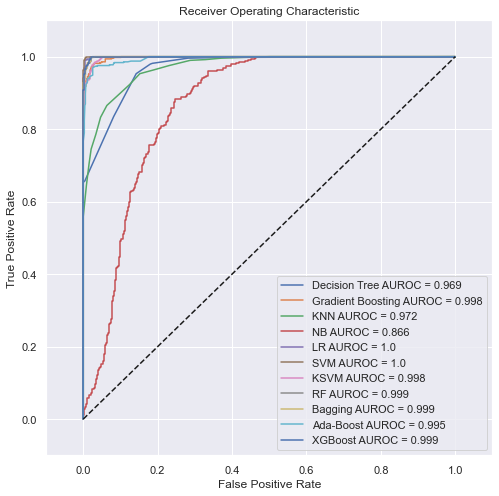

In [247]:
# Initialize plot
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')


#---------------------------------------------------------------- 1- DT---- #

# Predicts X_test using model
DT_pred = DecisionTreeModel.predict_proba(test_features)
DT_pred = [p[1] for p in DT_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, DT_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Decision Tree', auroc))



#---------------------------------------------------------------- 2- GB ---- #

# Predicts X_test using model
GB_pred = GBModel.predict_proba(test_features)
GB_pred = [p[1] for p in GB_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, GB_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Gradient Boosting', auroc))


#---------------------------------------------------------------- 3 - KNN---- #

# Predicts test_features using model
KNN_pred = KNNModel.predict_proba(test_features)
KNN_pred = [p[1] for p in KNN_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, KNN_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('KNN', auroc))


#---------------------------------------------------------------- 4- NB---- #
# Predicts test_features using model
NB_pred = NBModel.predict_proba(test_features)
NB_pred = [p[1] for p in NB_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, NB_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('NB', auroc))


#---------------------------------------------------------------- 5 - LR ---- #
# Predicts test_features using model
LR_pred = LRModel.predict_proba(test_features)
LR_pred = [p[1] for p in LR_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, LR_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('LR', auroc))


# #---------------------------------------------------------------- 6 - SVM ---- #
# Predicts test_features using model
SVM_pred = SVMModel.predict_proba(test_features)
SVM_pred = [p[1] for p in SVM_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, SVM_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('SVM', auroc))

# #---------------------------------------------------------------- 6 - KSVM ---- #
# # Predicts test_features using model
KSVM_pred = KSVMModel.predict_proba(test_features)
KSVM_pred = [p[1] for p in KSVM_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, KSVM_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('KSVM', auroc))
#---------------------------------------------------------------- 7 - RF ---- #
# Predicts test_features using model
RF_pred = RFModel.predict_proba(test_features)
RF_pred = [p[1] for p in RF_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, RF_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('RF', auroc))


#---------------------------------------------------------------- 8 - Bagging ---- #
# Predicts test_features using model
Bagg_pred = BModel.predict_proba(test_features)
Bagg_pred = [p[1] for p in Bagg_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, Bagg_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Bagging', auroc))


#---------------------------------------------------------------- 9 - Ada-Boost ---- #
# Predicts test_features using model
ADB_pred = ADBModel.predict_proba(test_features)
ADB_pred = [p[1] for p in ADB_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, ADB_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Ada-Boost', auroc))


#---------------------------------------------------------------- 9 - Ada-Boost ---- #
# Predicts test_features using model
y_pred = XGB.predict_proba(test_features)
y_pred = [p[1] for p in y_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, y_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('XGBoost', auroc))


# ---- Legend and labels ---- #

# Plot legend
plt.legend(loc='lower right')

# Plots 45 degree dotted black line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model selection: Cross Validation

In [250]:
#from sklearn.model_selection import KFold
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('CART ', DecisionTreeClassifier(criterion = 'entropy', random_state = 45)))
models.append(('GNB  ', GaussianNB()))
models.append(('LRM  ', LogisticRegression(random_state = 45, solver='newton-cg', max_iter=1000)))
models.append(('SVM  ', SVC(kernel = 'linear', random_state = 45)))
models.append(('KSVM ', SVC(kernel = 'rbf', random_state = 45)))
models.append(('KNN  ', KNeighborsClassifier(n_neighbors = 57  , metric = 'minkowski', p = 2)))
models.append(('RFM  ', RandomForestClassifier(n_estimators=80, max_features=7, oob_score= True, random_state= 42)))
models.append(('BAG  ', BaggingClassifier()))
models.append(('ABM  ', AdaBoostClassifier(random_state=42 , n_estimators=  53, learning_rate = .7, algorithm = 'SAMME.R')))
models.append(('GBM  ', GradientBoostingClassifier()))
models.append(('XGB  ', XGBClassifier()))

results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features, training_target,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

CART   : 0.979583 (0.004778)
GNB    : 0.769375 (0.010817)
LRM    : 0.988958 (0.006608)
SVM    : 0.990417 (0.005162)
KSVM   : 0.977292 (0.005409)
KNN    : 0.875208 (0.014455)
RFM    : 0.985625 (0.005246)
BAG    : 0.985833 (0.003584)
ABM    : 0.965625 (0.009970)
GBM    : 0.980208 (0.006145)
[17:28:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

In [251]:
#from sklearn.model_selection import KFold
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('CART ', DecisionTreeClassifier(criterion = 'entropy', random_state = 45)))
models.append(('GNB  ', GaussianNB()))
models.append(('LRM  ', LogisticRegression(random_state = 45, solver='newton-cg', max_iter=1000)))
models.append(('SVM  ', SVC(kernel = 'linear', random_state = 45)))
models.append(('KSVM ', SVC(kernel = 'rbf', random_state = 45)))
models.append(('KNN  ', KNeighborsClassifier(n_neighbors = 57  , metric = 'minkowski', p = 2)))
models.append(('RFM  ', RandomForestClassifier(n_estimators=80, max_features=7, oob_score= True, random_state= 42)))
models.append(('BAG  ', BaggingClassifier()))
models.append(('ABM  ', AdaBoostClassifier(random_state=42 , n_estimators=  53, learning_rate = .7, algorithm = 'SAMME.R')))
models.append(('GBM  ', GradientBoostingClassifier()))
models.append(('XGB  ', XGBClassifier()))

results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, test_features, test_target,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

CART   : 0.968333 (0.004249)
GNB    : 0.789167 (0.015501)
LRM    : 0.975833 (0.010000)
SVM    : 0.985000 (0.007728)
KSVM   : 0.943333 (0.019826)
KNN    : 0.847500 (0.034420)
RFM    : 0.970833 (0.006972)
BAG    : 0.968333 (0.007728)
ABM    : 0.973333 (0.011055)
GBM    : 0.968333 (0.007265)
[17:28:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

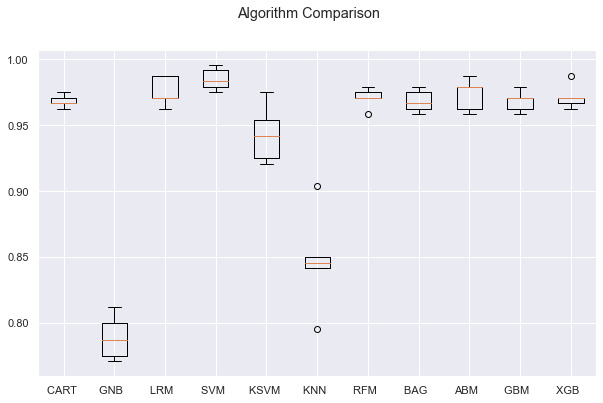

In [252]:
# Compare Algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Parameter Tunning

In [255]:
from sklearn.model_selection import GridSearchCV
XGB = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)


parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}



gbc_random = GridSearchCV(estimator=XGB,
param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

gbc_random.fit(training_features, training_target)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   13.8s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   57.9s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  4.8min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:  6.3min finished


[17:40:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=No

In [256]:
gbc_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [260]:
from sklearn.model_selection import cross_val_score
gbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

gbc.fit(training_features, training_target)

gbc_predict = gbc.predict(test_features)

gbc_cv_score = cross_val_score(gbc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(test_target, gbc_predict))
print('\n')

print("=== Classification Report ===")
print(classification_report(test_target, gbc_predict))
print('\n')

print("=== All AUC Scores ===")
print(gbc_cv_score)
print('\n')

print("=== Mean AUC Score ===")
print("Mean AUC Score - XGBoost Model: ", gbc_cv_score.mean())

[17:57:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective